<a href="https://colab.research.google.com/github/JoelHuitron/INTELIGENCIA-ARTIFICIAL/blob/JoelHuitron-patch-2/Copia_de_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AF #6: Aprendizaje supervisado, arbol de desicion

Joel Alonso Huitron Varela 1967359

María Angélica Ramírez Espericueta 2009245

Nancy pamela plaza muñoz 1898628

Othilia Jimena Flores Duarte 2052999

Cristian Gael Alvarado Ayala 2005742

Predicción 1 (entrada 0): 1 | Real: 1
Predicción 2 (entrada 10): 1 | Real: 1
Predicción 3 (entrada 50): 0 | Real: 0


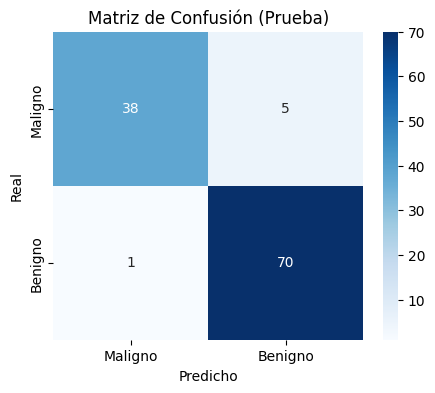

Precisión: 0.9473684210526315

Reporte de clasificación:
              precision    recall  f1-score   support

     Maligno       0.97      0.88      0.93        43
     Benigno       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
# 1. Cargar el dataset manualmente desde un archivo CSV
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/data.csv")
df = df.drop('id', axis=1)

# Codificar variable 'diagnosis': maligno = 0, benigno = 1
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

# Separar características y etiquetas
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 2. Dividir los datos: 80% entrenamiento y 20% prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo.fit(X_train, y_train)

# 4. Realizar 3 predicciones distintas (usando entradas diferentes)
entrada1 = X_test.iloc[[0]]
entrada2 = X_test.iloc[[10]]
entrada3 = X_test.iloc[[50]]

y_pred1 = modelo.predict(entrada1)
y_pred2 = modelo.predict(entrada2)
y_pred3 = modelo.predict(entrada3)

print("Predicción 1 (entrada 0):", y_pred1[0], "| Real:", y_test.iloc[0])
print("Predicción 2 (entrada 10):", y_pred2[0], "| Real:", y_test.iloc[10])
print("Predicción 3 (entrada 50):", y_pred3[0], "| Real:", y_test.iloc[50])

# 5. Predicción general sobre todo el test set
y_pred = modelo.predict(X_test)

# 6. Matriz de confusión (visual)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Maligno', 'Benigno'],
            yticklabels=['Maligno', 'Benigno'])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión (Prueba)")
plt.show()

# 7. Reporte de evaluación
print("Precisión:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["Maligno", "Benigno"]))


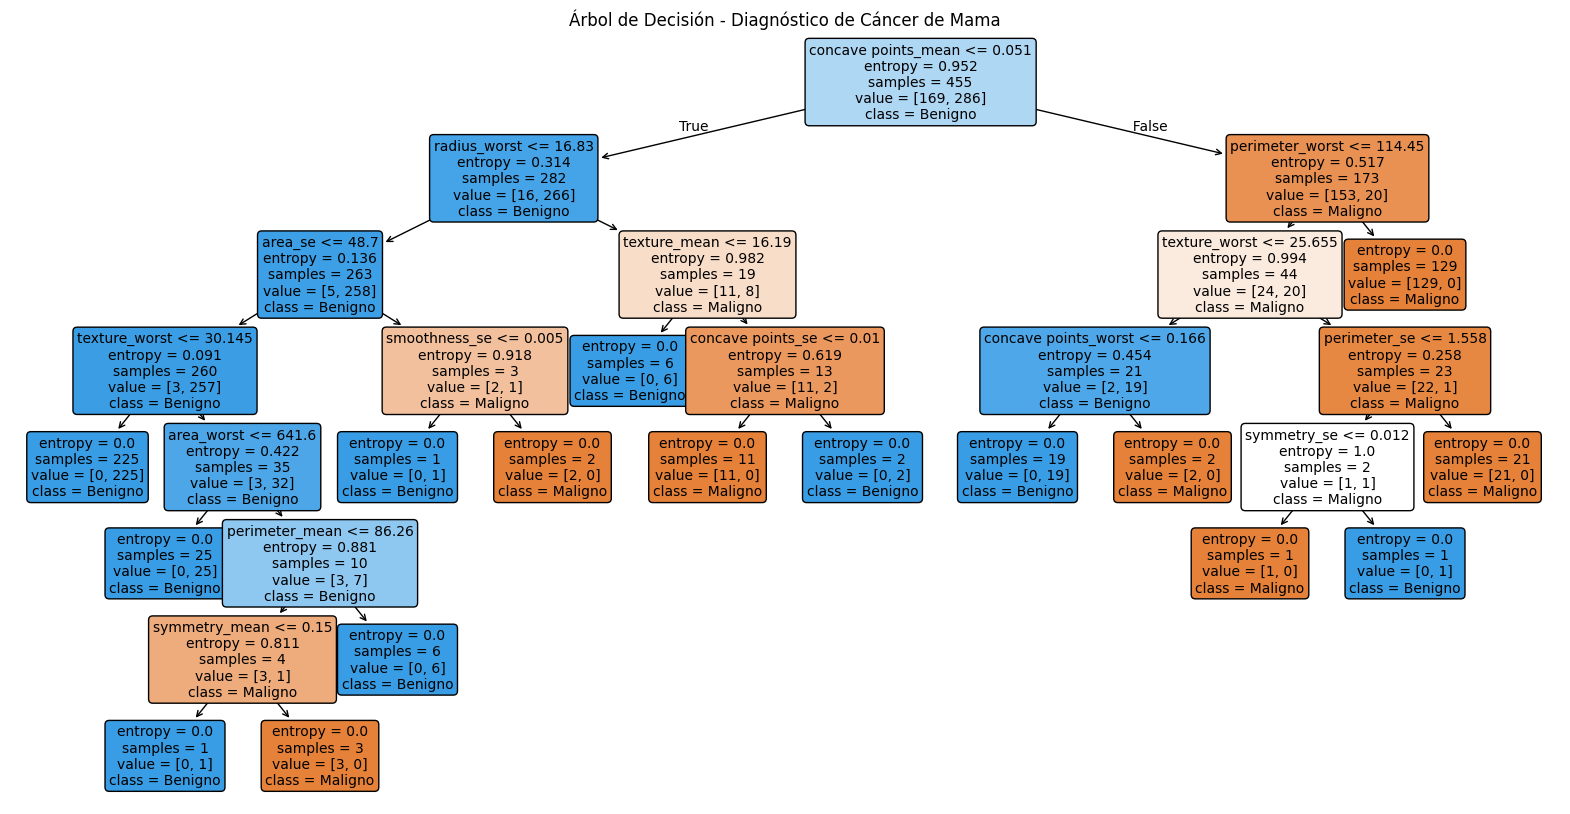

In [ ]:
# 8. Visualizar el árbol de decisión
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    modelo,
    filled=True,
    feature_names=X.columns,
    class_names=["Maligno", "Benigno"],
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión - Diagnóstico de Cáncer de Mama")
plt.savefig("arbol_decision.png", dpi=300)
plt.show()